<a href="https://colab.research.google.com/github/DavidCastro88/PredictDeathCovid-19/blob/main/Predictive_Mortality_Risk_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predictive Mortality Risk Model: Analysis of Symptoms and Medical Data in Patients with COVID-19***

### **Object:**

The central purpose of this project lies in the construction of an advanced machine learning model aimed at predicting, based on the symptoms, condition and current medical history of a patient affected by COVID-19, the probability that said patient will present a significantly elevated risk. The primary intent is to provide an effective tool that allows proactive assessment of mortality risk in specific patients, based on relevant and individual-specific information. This approach seeks not only to diagnose the presence of the virus, but also to anticipate the degree of severity associated with the patient's condition, which can be instrumental in making medical decisions and allocating resources more efficiently.

In [2]:
#Common libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Model Selection for Cross Validation
from sklearn.model_selection import train_test_split

# Machine Learning metrics
from sklearn import metrics

# ML classifiers
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier,
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier
    )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# ML Regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

#Metrics Clasificaction
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve,
                             precision_recall_curve, average_precision_score
)

#Metricas Regression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             explained_variance_score, max_error, mean_poisson_deviance, mean_gamma_deviance
                             )
# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

## **1. Recopliación de datos históricos**


In [3]:
data= pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/PredictDeathCovid-19/main/Covid_Data.csv', sep=',',decimal='.')

In [4]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


The data set was provided by the Mexican government ([Link](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico)). This data set contains a huge amount of anonymous information related to the patient, including previous conditions. The raw data set consists of 21 unique features and 1,048,576 unique patients.

### ***Explanation of variables***

1(Yes), 2(No), 97 and 99 (missing data).

USMER: Indicator that classifies whether a patient has been treated in first, second or third level medical units. (1,2 or 3).

MEDICAL_UNIT: Type of institution of the National Health System that provided the care. (1-13)

SEX: 1 - female. 2 - male.

PATIENT_TYPE: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

DATA_DIED: If the patient died indicate the date of death, and 9999-99-99 otherwise.

INTUBED: Whether the patient was connected to the ventilator.

PNEUMONIA: whether the patient already have air sacs inflammation or not.

AGE: age of the patient.

PREGNANT: whether the patient is pregnant or not.

DIABETES: whether the patient has diabetes or not.

COPD: whether the patient has Chronic obstructive pulmonary disease or not.

ASTHMA: Whether the patient has asthma or not.

INMSUPR: Whether the patient is immunosuppressed or not.

HIPERTENSION: Whether the patient has hypertension or not.

OTHER_DISEASE: Whether the patient has other disease or not.

CARDIOVASCULAR: Whether the patient has heart or blood vessels related disease.

OBESITY: Whether the patient is obese or not.

RENAL_CHRONIC: Whether the patient has chronic renal disease or not.

TOBACCO: Whether the patient is a tobacco user.

CLASIFFICATION_FINAL: Covid test results. see data description, classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.




## **Data Processing**

In [5]:
data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [6]:
data.shape

(1048575, 21)

Delete the columns USMER, MEDICAL_UNIT, PATIENT_TYPE becausea are varibles that not correspond to conditions and health analysis of the patient.

In [7]:
data= data.drop(columns=['USMER','MEDICAL_UNIT','PATIENT_TYPE'],axis=1)
data

,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


Replace the values are equals to 97 or 99, by NaN because correspond to missing values.

In [8]:
data.replace([97, 99,98], np.nan, inplace=True)

In the Data died column replace 9999-99-99 with 0, and any date with 1 (Indicate that patient are died)

In [9]:
data['DATE_DIED'] = data['DATE_DIED'].apply(lambda x: 0 if x=='9999-99-99' else 1)
data['DATE_DIED'].value_counts()

0    971633
1     76942
Name: DATE_DIED, dtype: int64

In [10]:
total_filas = len(data)
data_missing = data.isnull().sum().to_frame(name='Valores Faltantes')
data_missing['Porcentaje'] = (data_missing['Valores Faltantes'] / total_filas) * 100
data_missing.reset_index(inplace=True)
data_missing.rename(columns={'index': 'Variable'}, inplace=True)
data_missing

,Variable,Valores Faltantes,Porcentaje
0,SEX,0,0.000000
1,DATE_DIED,0,0.000000
2,INTUBED,855869,81.622106
3,PNEUMONIA,16003,1.526166
4,AGE,345,0.032902
5,PREGNANT,527265,50.283957
6,DIABETES,3338,0.318337
7,COPD,3003,0.286389
8,ASTHMA,2979,0.284100
9,INMSUPR,3404,0.324631


Delete the columns INTUBED and ICU,because have more of 80% missing values.

In [11]:
data= data.drop(columns=['INTUBED','ICU'],axis=1)

In [12]:
count = data['PNEUMONIA'].value_counts()
percentage = (count / len(data)) * 100
result = pd.DataFrame({
    'PNEUMONIA': count.index,
    'Cantidad': count.values,
    'Porcentaje': percentage.values
})
result

,PNEUMONIA,Cantidad,Porcentaje
0,2.0,892534,85.118756
1,1.0,140038,13.355077


The missing values of PNEUMONIA column, are impute with simple random sampling, because are few values.

In [13]:
index_missing = data[data['PNEUMONIA'].isnull()].index
valores_aleatorios = data['PNEUMONIA'].dropna().sample(len(index_missing), random_state=42)
data.loc[index_missing, 'PNEUMONIA'] = valores_aleatorios.values

The missing values of DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO, are inputed with random sampling

In [14]:
def input_random_sampling(column):
    valores_no_nulos = column.dropna()
    column.loc[column.isna()] = valores_no_nulos.sample(n=column.isna().sum(), replace=True, random_state=42).values
    return column

In [15]:
columns_to_impute = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
                     'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

for col in columns_to_impute:
    data[col] = input_random_sampling(data[col])

<ipython-input-14-8c99e82acfcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column.isna()] = valores_no_nulos.sample(n=column.isna().sum(), replace=True, random_state=42).values


The missing values of AGE column, are impute with de median.

In [16]:
mediana_age = data['AGE'].median()
data['AGE'].fillna(mediana_age, inplace=True)

In [17]:
count_pregnant = data['PREGNANT'].value_counts()
percentage = (count_pregnant / len(data)) * 100
result = pd.DataFrame({
    'PREGNANT': count_pregnant.index,
    'Cantidad': count_pregnant.values,
    'Porcentaje': percentage.values
})
result

,PREGNANT,Cantidad,Porcentaje
0,2.0,513179,48.940610
1,1.0,8131,0.775433


In [18]:
data=data.drop('PREGNANT',axis=1)
data

,SEX,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,1.0,65.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3
1,2,1,1.0,72.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5
2,2,1,2.0,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
3,1,1,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
4,2,1,2.0,68.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,0,2.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
1048571,2,0,2.0,51.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7
1048572,2,0,2.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
1048573,2,0,2.0,28.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7


Replace grades of the CLASIFFICATION_FINAL column, 1-3 by 1, ande 4-7 by 0, because since we are interested if the patient is diagnosed with covid, or if the test is inconclusive or does not carry covid, but not the grade.

In [19]:
data['CLASIFFICATION_FINAL']=data['CLASIFFICATION_FINAL'].apply(lambda x: 0 if x>3 else 1)
data['CLASIFFICATION_FINAL'].value_counts()

0    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64

Replace 2 by 0, for more facility

In [20]:
columns_to_replace = data.columns[data.columns != 'AGE']
data[columns_to_replace] = data[columns_to_replace].replace(2, 0)

In [21]:
data.rename(columns={'DATE_DIED': 'DIED'}, inplace=True)

In [22]:
data = data.astype(int)
data

,SEX,DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,1,65,0,0,0,0,1,0,0,0,0,0,1
1,0,1,1,72,0,0,0,0,1,0,0,1,1,0,0
2,0,1,0,55,1,0,0,0,0,0,0,0,0,0,1
3,1,1,0,53,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,68,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0
1048571,0,0,0,51,0,0,0,0,1,0,0,0,0,0,0
1048572,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0


## **EDA**

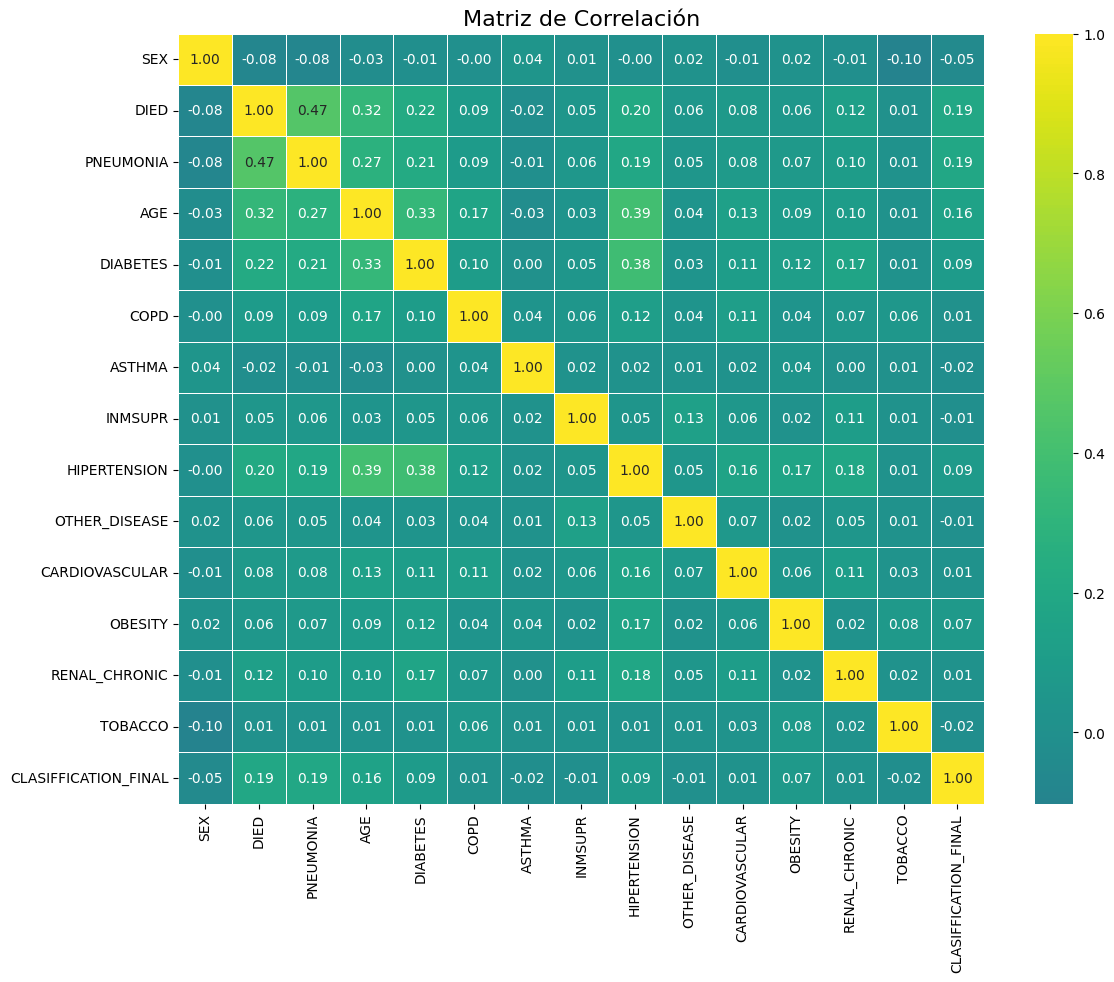

In [23]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

From the correlation matrix, we see that only the variables PNEUMONIA and AGE, has a correlation moderate, and the rest has a weak correlation.


Next we are going to see the relationship between the variable of interest and each of the recorded characteristics. Since they are binary variables, contingency tables will be used in the vast majority of times.

***Age***

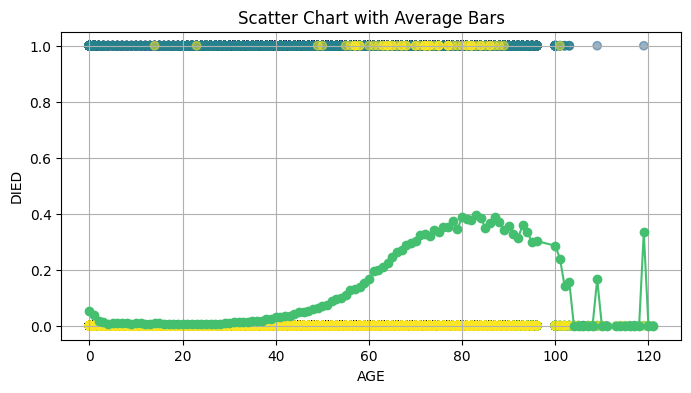

In [24]:
#Gráfico de dispersión con barras de promedio
data_prueba_edad = data.copy()
promedios = data_prueba_edad.groupby('AGE')['DIED'].mean().reset_index()
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(data_prueba_edad['AGE'])))
tono_morado = cmap(0.7)
plt.figure(figsize=(8, 4))
scatter = plt.scatter(data_prueba_edad['AGE'], data_prueba_edad['DIED'], alpha=0.5, c=colors)
plt.plot(promedios['AGE'], promedios['DIED'], color=tono_morado, marker='o', linestyle='-')
plt.xlabel('AGE')
plt.ylabel('DIED')
plt.title('Scatter Chart with Average Bars')
plt.grid(True)
plt.show()

With increasing the age of person, there is more probability that the person died.

***Sex***

In [34]:
pd.crosstab(data['SEX'],data['DIED'],  normalize='index') * 100

DIED,0,1
SEX,,
0,90.536971,9.463029
1,94.781208,5.218792


From the contingency table, we can see that the 9.46% of the people of the male gender died, and the 5.22% of the woman register died, death being more common in men than woman.
​

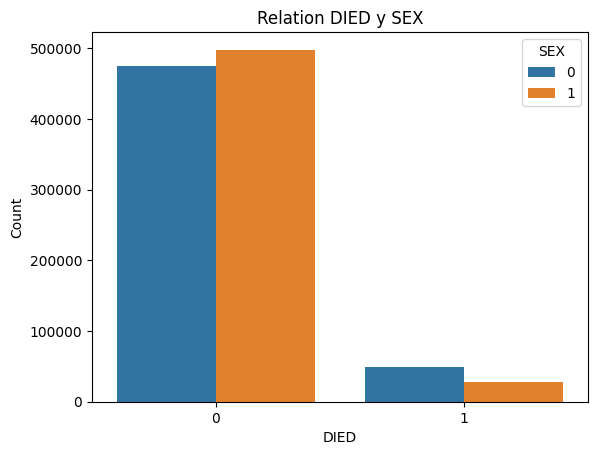

In [35]:
# Crear un gráfico de barras
sns.countplot(data=data, x='DIED', hue='SEX')

# Añadir etiquetas y título
plt.xlabel('DIED')
plt.ylabel('Count')
plt.title('Relation DIED y SEX')
plt.legend(title='SEX', loc='upper right')

# Mostrar el gráfico
plt.show()

Although there are more cases or registers of infections in woman than in mens, is more probability the death in the male gender.

***PNEUMONIA***

In [37]:
pd.crosstab(data['DIED'],data['PNEUMONIA'],  normalize='index') * 100

PNEUMONIA,0,1
DIED,,
0,90.926101,9.073899
1,29.774376,70.225624


The 70% of people who died, suffered of pneumonia, therefore is one of the more important critical symptom or illness of the person, with covid-19.

***DIABETES***

In [39]:
pd.crosstab(data['DIABETES'],data['DIED'],  normalize='index') * 100

DIED,0,1
DIABETES,,
0,94.736876,5.263124
1,77.388614,22.611386


The 22.6% of records who have diabetes died.

***COPD***

In [41]:
pd.crosstab(data['DIED'],data['COPD'],  normalize='index') * 100

COPD,0,1
DIED,,
0,98.859960,1.140040
1,94.753191,5.246809


The 5.25% of people who died suffered from COPD.

***ASTHMA***

In [47]:
pd.crosstab(data['DIED'],data['ASTHMA'],  normalize='index') * 100

ASTHMA,0,1
DIED,,
0,96.895844,3.104156
1,98.054379,1.945621


Only 1.94% of person that died suffered of asthma, therefore we question the importance of the characteristic.

***INMSUPR***

In [49]:
pd.crosstab(data['DIED'],data['INMSUPR'],  normalize='index') * 100

INMSUPR,0,1
DIED,,
0,98.807369,1.192631
1,96.588339,3.411661


At first glance this variable seems to be of little relevance.

***HIPERTENSION***

In [51]:
pd.crosstab(data['DIED'],data['HIPERTENSION'],  normalize='index') * 100

HIPERTENSION,0,1
DIED,,
0,86.512809,13.487191
1,58.187986,41.812014


The 41.81% of registered people who died suffer from hipertension.

***CARDIOVASCULAR***

In [52]:
pd.crosstab(data['DIED'],data['CARDIOVASCULAR'],  normalize='index') * 100

CARDIOVASCULAR,0,1
DIED,,
0,98.314899,1.685101
1,94.213823,5.786177


Only 5.79% of people that died suffered of cardiovascular disease.

***OBESITY***

In [55]:
pd.crosstab(data['DIED'], data['OBESITY'], normalize='index') * 100

OBESITY,0,1
DIED,,
0,85.295168,14.704832
1,77.368667,22.631333


If the patient suffered obseity seems to be one characterist important.

***RENAL_CHRONIC***

In [60]:
pd.crosstab(data['DIED'], data['RENAL_CHRONIC'], normalize='index') * 100

RENAL_CHRONIC,0,1
DIED,,
0,98.637551,1.362449
1,92.571028,7.428972


Only the 7.43% of the patient register that suffered of any disease renal chronic died.

***TOBACCO***

In [61]:
pd.crosstab(data['DIED'], data['TOBACCO'], normalize='index') * 100

TOBACCO,0,1
DIED,,
0,91.974645,8.025355
1,91.358426,8.641574


At first glance, there seems to be no great relationship between the people who died and those who smoked cigarettes.

***CLASIFFICATION_FINAL***

In [65]:
pd.crosstab(data['DIED'], data['CLASIFFICATION_FINAL'], normalize='index') * 100

CLASIFFICATION_FINAL,0,1
DIED,,
0,65.239653,34.760347
1,29.510540,70.489460


The 70.5% of times, that the patient died, he was diagnosed Covid with complete certainty, therefore seems to be an importan feature.

With the above analysis, let's choose some data structure, to check different models with different features.

In [69]:
data_1 = data.copy()
data_2 = data.copy()
data_3 = data.copy()

In [70]:
data_1= data_1[['DIED','AGE','PNEUMONIA','DIABETES','HIPERTENSION']]
data_1

,DIED,AGE,PNEUMONIA,DIABETES,HIPERTENSION
0,1,65,1,0,1
1,1,72,1,0,1
2,1,55,0,1,0
3,1,53,0,0,0
4,1,68,0,1,1
...,...,...,...,...,...
1048570,0,40,0,0,0
1048571,0,51,0,0,1
1048572,0,55,0,0,0
1048573,0,28,0,0,0


In [71]:
data_2= data_2[['DIED','AGE','PNEUMONIA','DIABETES','HIPERTENSION','OBESITY','SEX','CLASIFFICATION_FINAL']]
data_2

,DIED,AGE,PNEUMONIA,DIABETES,HIPERTENSION,OBESITY,SEX,CLASIFFICATION_FINAL
0,1,65,1,0,1,0,1,1
1,1,72,1,0,1,1,0,0
2,1,55,0,1,0,0,0,1
3,1,53,0,0,0,0,1,0
4,1,68,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
1048570,0,40,0,0,0,0,0,0
1048571,0,51,0,0,1,0,0,0
1048572,0,55,0,0,0,0,0,0
1048573,0,28,0,0,0,0,0,0


##  ***MODELING***

In [72]:
X1 = data_1.drop('DIED', axis=1)
y1 = data_1['DIED']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

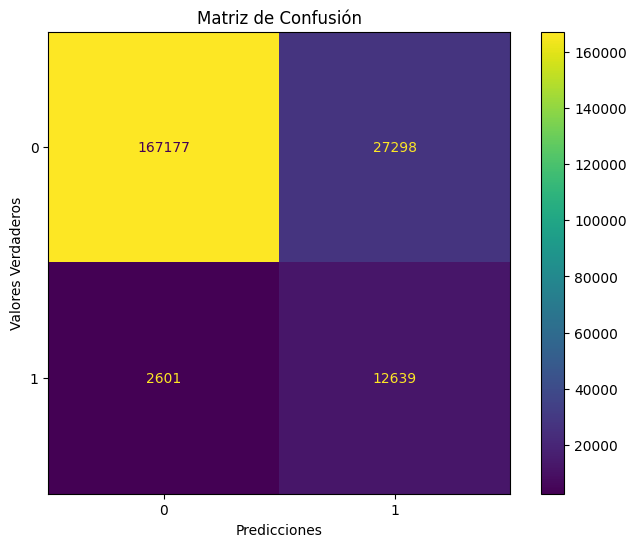

In [73]:
# Inicialización del modelo
mod1 = LogisticRegression(max_iter=1000, class_weight = 'balanced')
# Entrenamiento
mod1.fit(X_train_1, y_train_1)
# Realizar predicciones en el conjunto de validación
Y_pred_mod1 = mod1.predict(X_test_1)
accuracy_mod1 = metrics.accuracy_score(y_test_1, Y_pred_mod1)
precision_mod1 = metrics.precision_score(y_test_1, Y_pred_mod1)
recall_mod1 = metrics.recall_score(y_test_1, Y_pred_mod1)
f1_mod1 = metrics.f1_score(y_test_1, Y_pred_mod1)

cm = metrics.confusion_matrix(y_test_1, Y_pred_mod1)
plt.rcParams["axes.grid"] = False
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod1.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='viridis', values_format='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

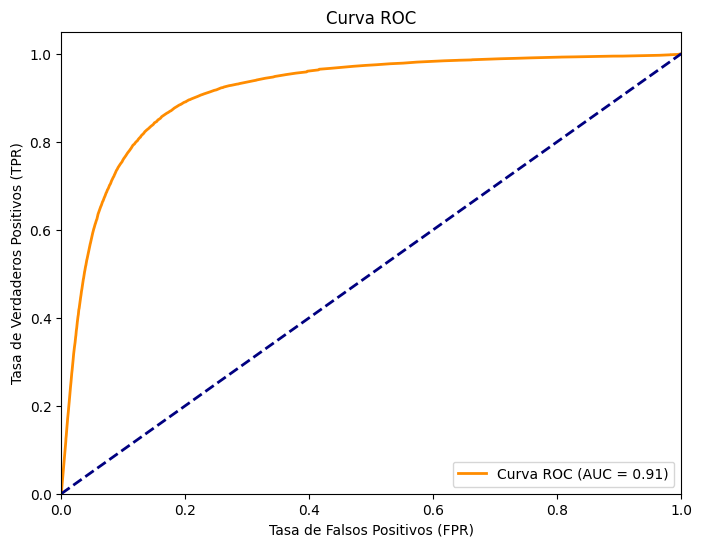

In [74]:
#Probabilidades de predicción en el conjunto de validación
prob_predict_mod1 = mod1.predict_proba(X_test_1)[:, 1]
fpr1, tpr1, umbrales1 = metrics.roc_curve(y_test_1, prob_predict_mod1)

# Calcular el área bajo la curva ROC (AUC)
auc_mod1 = metrics.roc_auc_score(y_test_1, prob_predict_mod1)

# Crear la gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_mod1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [83]:
accuracy_score(y_test_1, Y_pred_mod1)

0.8574303221038075

## **Pruebas**

In [ ]:
datSa = {'columna': [1, 2, np.nan, 4, np.nan, 6, 7, np.nan, 9]}

